In [1]:
# LIBRERIAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

# from google.colab import files
# uploaded = files.upload()

from google.colab import drive
drive.mount('/content/drive')

# PARAMETROS

rnd_state = 42

# TABLAS

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/UTN//bikeshare.csv")

Mounted at /content/drive


## PREPROCESAMIENTO

In [2]:
df

,season,yr,mnth,hr,holiday,weekday,notbizday,weathersit,temp,hum,windspeed,dteday,cnt
0,1,0,1,0,0,6,1,1,-1.334609,0.947345,-1.553844,2011-01-01,16
1,1,0,1,1,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,40
2,1,0,1,2,0,6,1,1,-1.438475,0.895513,-1.553844,2011-01-01,32
3,1,0,1,3,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,13
4,1,0,1,4,0,6,1,1,-1.334609,0.636351,-1.553844,2011-01-01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,0,2,-1.230743,-0.141133,-0.211685,2012-12-31,119
17375,1,1,12,20,0,1,0,2,-1.230743,-0.141133,-0.211685,2012-12-31,89
17376,1,1,12,21,0,1,0,1,-1.230743,-0.141133,-0.211685,2012-12-31,90
17377,1,1,12,22,0,1,0,1,-1.230743,-0.348463,-0.456086,2012-12-31,61


In [3]:
df.isna().sum()

,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
notbizday,0
weathersit,0
temp,0
hum,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   weekday     17379 non-null  int64  
 6   notbizday   17379 non-null  int64  
 7   weathersit  17379 non-null  int64  
 8   temp        17379 non-null  float64
 9   hum         17379 non-null  float64
 10  windspeed   17379 non-null  float64
 11  dteday      17379 non-null  object 
 12  cnt         17379 non-null  int64  
dtypes: float64(3), int64(9), object(1)
memory usage: 1.7+ MB


Preparación del target:  

Los administradores de Capital Bikeshare han descubierto que el sistema funciona sin problemas hasta que se alquilan más de 500 bicicletas en una hora determinada. A partir de ese punto, se vuelve necesario incorporar bicicletas adicionales al sistema y moverlas entre estaciones para equilibrar la carga.

In [5]:
# si es > 500 el target es 1, lo que buscamos. Para otro caso, es 0
target = np.where(df['cnt']>500, 1, 0)
target

array([0, 0, 0, ..., 0, 0, 0])

In [6]:
positivos = np.sum(target)
total = np.size(target)
print('Porcentaje de positivos: {:.2f}%'.format(100 * positivos / total))


Porcentaje de positivos: 7.36%


In [7]:
df.drop(['dteday', 'cnt'], axis=1, inplace=True)
df['target']=target

In [8]:
df.dtypes


,0
season,int64
yr,int64
mnth,int64
hr,int64
holiday,int64
weekday,int64
notbizday,int64
weathersit,int64
temp,float64
hum,float64


Las variables son categóricas, tenemos que transformarlas a tipo categórica

In [9]:
categorical_columns = ['season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'notbizday', 'weathersit']

for col in categorical_columns:
    df[col] = df[col].astype("category")

df.dtypes

,0
season,category
yr,category
mnth,category
hr,category
holiday,category
weekday,category
notbizday,category
weathersit,category
temp,float64
hum,float64


In [10]:
df.columns.difference(categorical_columns)

Index(['hum', 'target', 'temp', 'windspeed'], dtype='object')

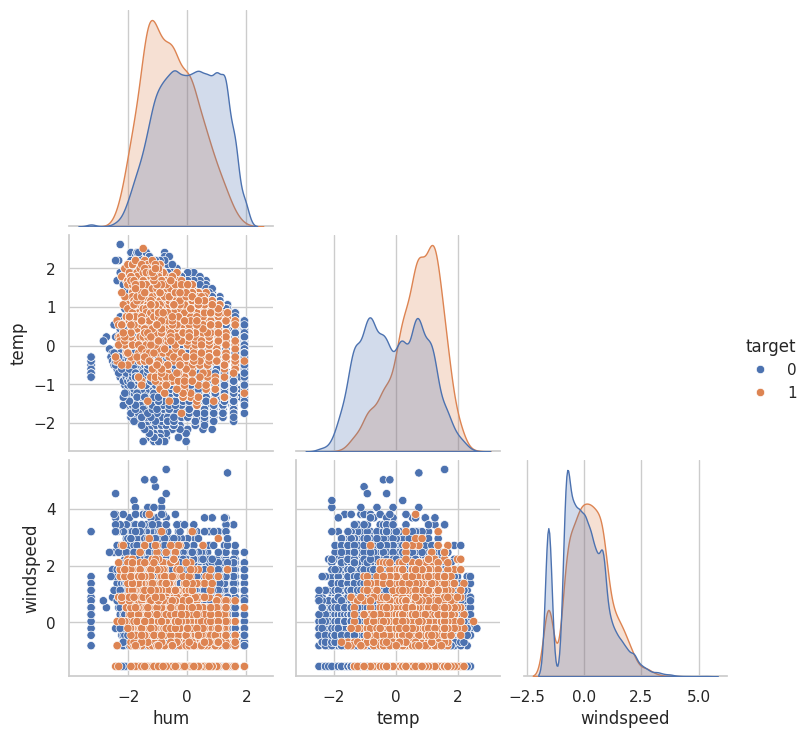

In [11]:
sns.set_style('whitegrid')
df_sorted = df.sort_values(by='target')
sns.pairplot(
    df_sorted[df_sorted.columns.difference(categorical_columns)],
    diag_kind='kde',
    hue='target',
    corner=True,
    kind='scatter',
    diag_kws=dict(common_norm=False)
)

## Feature Engineering

In [12]:
df_dummies = pd.get_dummies(df, drop_first=True)

In [13]:
print(df_dummies.dtypes)

temp            float64
hum             float64
windspeed       float64
target            int64
season_2           bool
season_3           bool
season_4           bool
yr_1               bool
mnth_2             bool
mnth_3             bool
mnth_4             bool
mnth_5             bool
mnth_6             bool
mnth_7             bool
mnth_8             bool
mnth_9             bool
mnth_10            bool
mnth_11            bool
mnth_12            bool
hr_1               bool
hr_2               bool
hr_3               bool
hr_4               bool
hr_5               bool
hr_6               bool
hr_7               bool
hr_8               bool
hr_9               bool
hr_10              bool
hr_11              bool
hr_12              bool
hr_13              bool
hr_14              bool
hr_15              bool
hr_16              bool
hr_17              bool
hr_18              bool
hr_19              bool
hr_20              bool
hr_21              bool
hr_22              bool
hr_23           

In [14]:
df_dummies.shape

(17379, 53)

In [15]:
y = df_dummies['target']
X = df_dummies.drop('target', axis=1)

In [16]:
scale = StandardScaler()
X_scaled = scale.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)




In [17]:
X_scaled.head()

,temp,hum,windspeed,season_2,season_3,season_4,yr_1,mnth_2,mnth_3,mnth_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,notbizday_1,weathersit_2,weathersit_3,weathersit_4
0,-1.334648,0.947372,-1.553889,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,-0.300232,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
1,-1.438516,0.895539,-1.553889,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,-0.300232,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
2,-1.438516,0.895539,-1.553889,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,-0.300232,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
3,-1.334648,0.636370,-1.553889,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,-0.300232,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314
4,-1.334648,0.636370,-1.553889,-0.583042,-0.590751,-0.567361,-1.005134,-0.289161,-0.304313,-0.300232,...,-0.407892,-0.405394,-0.407508,-0.407124,-0.408659,2.432774,1.4669,-0.595006,-0.298177,-0.01314


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=rnd_state)

## Entrenando Modelo

In [19]:
SVM = SVC()
SVM.fit(X_train, y_train)

y_hat = SVM.predict(X_test)

predictions = pd.DataFrame({ 'y_test':y_test,'y_hat':y_hat})
predictions.tail(10)

,y_test,y_hat
4768,0,0
14206,0,0
2115,0,0
11162,0,0
6717,0,0
12749,0,0
11476,0,0
12847,1,0
16721,0,0
9511,0,0


In [20]:
def my_SVM_report(X_train, y_train, X_test,y_test, C=1,gamma='scale' ,kernel='rbf'):

    train_set_count = X_train.shape[0]
    test_set_count = X_test.shape[0]
    positivos = np.sum(y_train)
    total = np.size(y_train)

    svc= SVC(C=C, gamma=gamma, kernel=kernel)
    svc.fit(X_train, y_train)
    y_hat = svc.predict(X_test)

    cm = confusion_matrix(y_test, y_hat)
    accuracy = round(accuracy_score(y_test,y_hat) ,4)
    error_rate = round(1-accuracy,4)
    precision = round(precision_score(y_test,y_hat),2)
    recall = round(recall_score(y_test,y_hat),2)
    f1score = round(f1_score(y_test,y_hat),2)
    cm_labled = pd.DataFrame(cm, index=['Actual : negativos ','Actual : positivos'], columns=['Predicción : negativos','Predict :positivos '])

    print("-----------------------------------------")
    print("Dataset")
    print('Tamaño train: {}'.format(train_set_count))
    print('Tamaño test: {}'.format(test_set_count))
    print('Porcentaje de positivos: {:.2f}%'.format(100 * positivos / total))
    print("-----------------------------------------")
    print("Resultados")
    print('Accuracy  = {}'.format(accuracy))
    print('Error_rate  = {}'.format(error_rate))
    print('Precision = {}'.format(precision))
    print('Recall    = {}'.format(recall))
    print('f1_score  = {}'.format(f1score))
    print("-----------------------------------------")
    return cm_labled


-----------------------------------------
Dataset
Tamaño train: 12165
Tamaño test: 5214
Porcentaje de positivos: 7.52%
-----------------------------------------
Resultados
Accuracy  = 0.9733
Error_rate  = 0.0267
Precision = 0.89
Recall    = 0.71
f1_score  = 0.79
-----------------------------------------


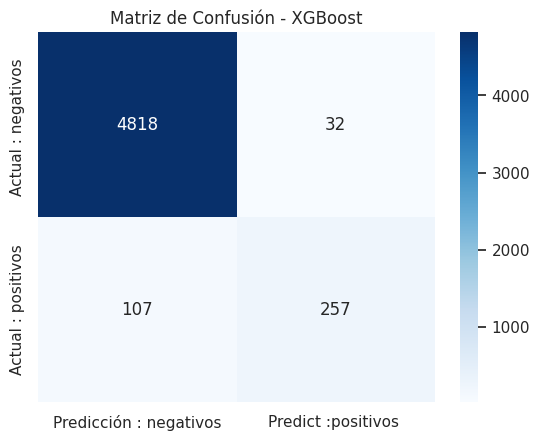

In [21]:
cm = my_SVM_report(X_train, y_train, X_test,y_test)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
plt.title("Matriz de Confusión - SVM")
plt.show()

In [22]:
my_param_grid = {'C': [10,100,1000], 'gamma': ['scale',0.01,0.001], 'kernel': ['rbf']}
GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [23]:
grid = GridSearchCV(estimator=SVC(),param_grid= my_param_grid, refit = True, verbose=2, cv=5 )
grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   1.1s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   1.7s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   1.8s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   1.6s
[CV] END ......................C=10, gamma=scale, kernel=rbf; total time=   1.3s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   1.1s
[CV] END .......................C=10, gamma=0.01, kernel=rbf; total time=   1.9s
[CV] END ......................C=10, gamma=0.001, kernel=rbf; total time=   4.3s
[CV] END ......................C=10, gamma=0.001,

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [10, 100, 1000], 'gamma': ['scale', 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [24]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [25]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [26]:
my_SVM_report(X_train, y_train, X_test,y_test,C=1000, gamma=0.01)

-----------------------------------------
Dataset
Tamaño train: 12165
Tamaño test: 5214
Porcentaje de positivos: 7.52%
-----------------------------------------
Resultados
Accuracy  = 0.982
Error_rate  = 0.018
Precision = 0.87
Recall    = 0.87
f1_score  = 0.87
-----------------------------------------


,Predicción : negativos,Predict :positivos
Actual : negativos,4804,46
Actual : positivos,48,316
